In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Bank_Personal_Loan_Modelling.csv",index_col='ID')

In [4]:
data.head(3)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [5]:
data.shape

(5000, 13)

In [6]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

<b>All the data types are numeric

In [7]:
#Zip code column can be dropped as it does not affect the outcome
data.drop('ZIP Code',axis=1,inplace=True)
data.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,0,1,0,0,0
2,45,19,34,3,1.5,1,0,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0,0


<b>2.Study the data distribution in each attribute, share your findings. (5 points)

In [8]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


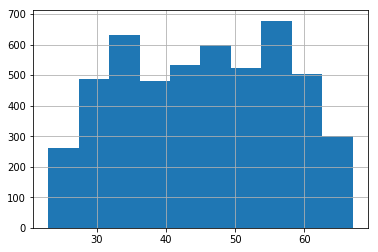

In [36]:
data['Age'].hist()

<b>Distribution of Age variable is not normal as Mode value is shifted towards right side of distribution.It is closer to a multimodal distribution.

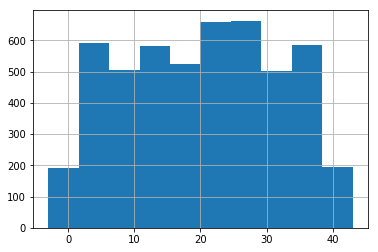

In [37]:
data['Experience'].hist()

<b>Distribution of Experiece variable is multimodal.Also there are some negative values which need to be removed as experience can not be negative. 

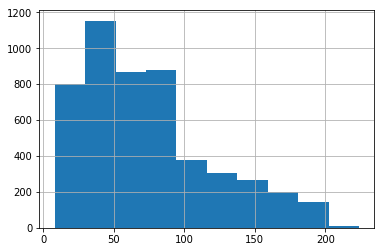

In [42]:
data['Income'].hist()

<b>Distribution of Income variable is right skewed with more number of people having less income.

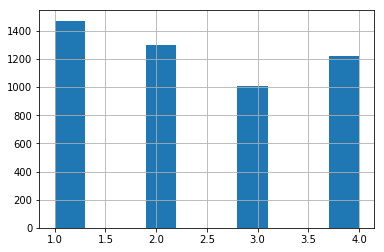

In [43]:
data['Family'].hist()

<b>Family variable has descrete values

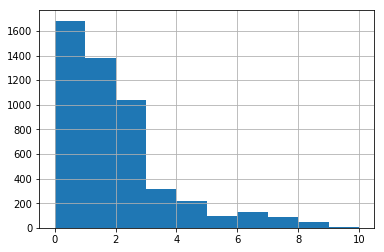

In [45]:
data['CCAvg'].hist()

<b>CCAvg variable has right skewed distribution.

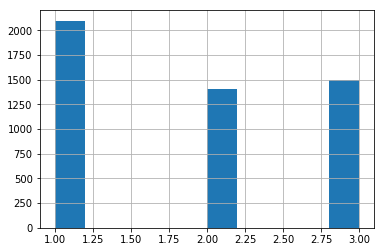

In [47]:
data['Education'].hist()

<b> Education variable takes descrete values with mode at 1.

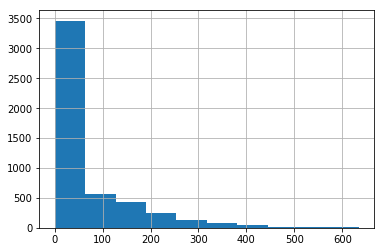

In [48]:
data['Mortgage'].hist()

<b> Mortgage has right skewed distribution

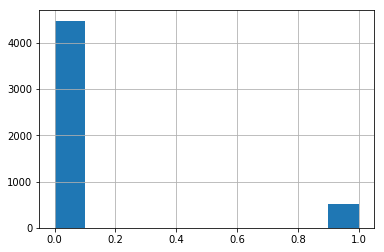

In [50]:
data['Securities Account'].hist()

<b> Securities Account is binary variable with most entries belonging to Class 0(i.e people dont have securities account)

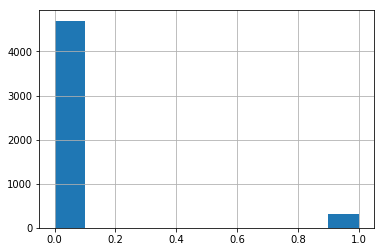

In [51]:
data['CD Account'].hist()

<b> CD Account is binary variable with most entries belonging to Class 0(i.e people dont have CD account)

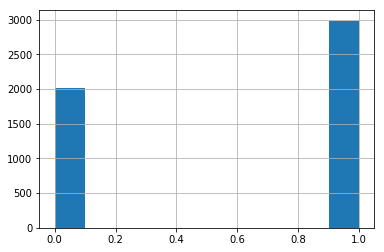

In [52]:
data['Online'].hist()

<b>Online variable is binary variable with most entries belonging to Class 1(i.e people use online banking)

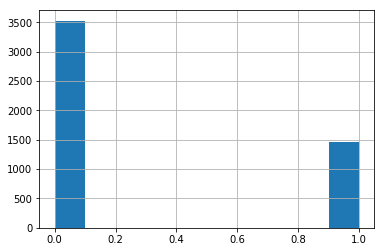

In [53]:
data['CreditCard'].hist()

<b>Credit card is binary variable and most people dont have a credit card.

<b>3.Get the target column distribution. Your comments

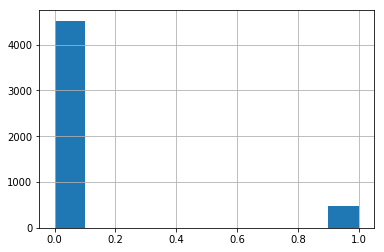

In [55]:
data['Personal Loan'].hist()

<b> Personal Loan is binary variable with most entries belonging to Class 0(i.e people have not opted for loan)

<b>4.Split the data into training and test set in the ratio of 70:30 respectively

In [15]:
from sklearn.model_selection import train_test_split

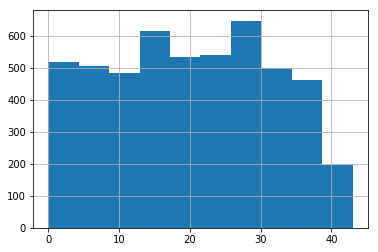

In [76]:
#Replace negative values in experience column
data['Experience'].where(data['Experience']>0,0,inplace=True)
data['Experience'].hist()

In [10]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<b>Age and experience columns are highly correalated so one column out of these 2 can be dropped.

In [11]:
data.drop('Experience',axis=1,inplace=True)

In [12]:
#Independent variables
X=data.drop('Personal Loan',axis=1)
X.head(3)

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,
1,25,49,4,1.6,1,0,1,0,0,0
2,45,34,3,1.5,1,0,1,0,0,0
3,39,11,1,1.0,1,0,0,0,0,0


In [13]:
#Dependent variable
Y=data['Personal Loan']

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

<b>Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [18]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
Y_pred_LR=LR.predict(X_test)

In [20]:
metrics.accuracy_score(Y_test,Y_pred_LR)

0.9526666666666667

In [71]:
#KNN
knn=KNeighborsClassifier(n_neighbors=15,metric='manhattan')

In [72]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [73]:
Y_pred_knn=knn.predict(X_test)

In [74]:
metrics.accuracy_score(Y_test,Y_pred_knn)

0.9273333333333333

In [25]:
#Naive Bayes
nb=GaussianNB()

In [26]:
nb.fit(X_train,Y_train)

GaussianNB(priors=None)

In [29]:
Y_pred_nb=nb.predict(X_test)

In [31]:
metrics.accuracy_score(Y_test,Y_pred_nb)

0.886

<b>6.Print the confusion matrix for all the above models (5 points)

In [32]:
#Linear Regression
print(metrics.confusion_matrix(Y_test, Y_pred_LR))

[[1355   17]
 [  54   74]]


In [75]:
#KNN
print(metrics.confusion_matrix(Y_test, Y_pred_knn))

[[1357   15]
 [  94   34]]


In [34]:
#Naive Bayes
print(metrics.confusion_matrix(Y_test, Y_pred_nb))

[[1254  118]
 [  53   75]]


<b>7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

In [76]:
print(metrics.classification_report(Y_test, Y_pred_LR))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1372
          1       0.81      0.58      0.68       128

avg / total       0.95      0.95      0.95      1500



In [77]:
print(metrics.classification_report(Y_test, Y_pred_knn))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      1372
          1       0.69      0.27      0.38       128

avg / total       0.91      0.93      0.91      1500



In [37]:
print(metrics.classification_report(Y_test, Y_pred_nb))

             precision    recall  f1-score   support

          0       0.96      0.91      0.94      1372
          1       0.39      0.59      0.47       128

avg / total       0.91      0.89      0.90      1500



<b>Logistic Regression model performs better in this case as its accuracy,precision,recall and f1 score is better than other models.KNN comes next to logistic regression.